[View in Colaboratory](https://colab.research.google.com/github/bell-one/tf_colab/blob/master/MNIST_CNN_basic_tf.ipynb)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


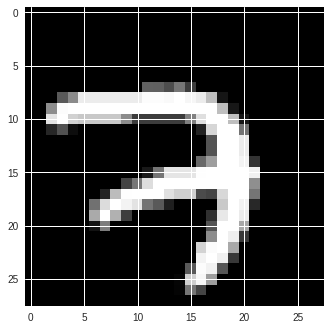

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


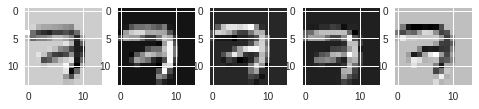

In [2]:
sess = tf.InteractiveSession()
img=img.reshape(-1, 28, 28, 1)
W1 = tf.get_variable("W1", shape=[3, 3, 1, 5], initializer=tf.contrib.layers.xavier_initializer())
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
  plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14,), cmap='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


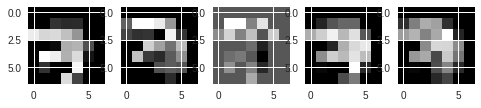

In [3]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
  plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7,), cmap='gray')